In [5]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier

import pickle

from analyseModel import results
from hyperparameterTuning import hyperparamTraining as hpt 

In [2]:
file = open('../../data/ML_models/model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [3]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
columns = data['x_feature']

******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7778566359119943

classification report :
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.65      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



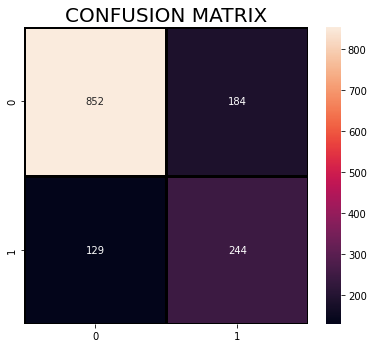

In [7]:
xgb = XGBClassifier()
results(xgb, x_train, y_train, x_test, y_test, None, None)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'max_depth': 7, 'n_estimators': 7}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=7, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7686302342086586

classification report :
               precision    recall  f1-score   support

           

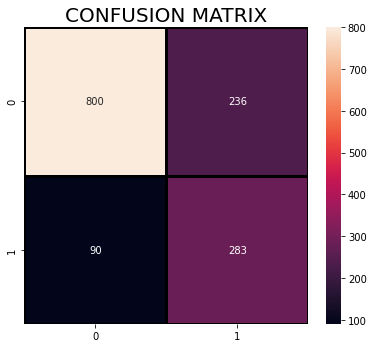

In [11]:
param = {
    'n_estimators' : [5, 7, 9], 
    'max_depth' : [3, 5, 7]
}
xgb =XGBClassifier()
xgbModel = hpt(xgb, x_train, y_train, x_test, y_test, param, None, None)

In [12]:
file = open('../../data/ML_models/xgbModel.pkl', 'wb')
pickle.dump(xgbModel, file)